In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import cv2
import pickle
import os

### [Camera Instrinsic Calibration](https://sharad-rawat.medium.com/raspberry-pi-camera-module-calibration-using-opencv-f75ff9fc1441) and [code](https://github.com/SharadRawat/pi_sensor_setup/blob/master/camera_calibration/camera_calibration.py?source=post_page-----f75ff9fc1441--------------------------------)
[Calibration chess board image used](https://www.mrpt.org/downloads/camera-calibration-checker-board_9x7.pdf)

In [3]:
def Calibrate():
    # Number of object points
    num_intersections_in_x = 6
    num_intersections_in_y = 9
    # Size of square in meters
    square_size = 5e-3 # 5mm
    # Arrays to store 3D points and 2D image points
    obj_points = []
    img_points = []
    # Prepare expected object 3D object points (0,0,0), (1,0,0) ...
    object_points = np.zeros((num_intersections_in_x*num_intersections_in_y,3), np.float32)
    object_points[:,:2] = np.mgrid[0:num_intersections_in_x, 0:num_intersections_in_y].T.reshape(-1,2)
    object_points = object_points*square_size
    fnames = glob.glob(os.getcwd()+'\\data\\calibration_images\\'+'*.'+'jpg')
    for fname in fnames:
        img = cv2.imread(fname)
        img_size = (img.shape[1], img.shape[0])
        gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Find chess board corners
        ret, corners = cv2.findChessboardCorners(gray_scale, (num_intersections_in_x, num_intersections_in_y), None)
        if ret:
            obj_points.append(object_points)
            img_points.append(corners)
            # Draw the corners
            drawn_img = cv2.drawChessboardCorners(img, (num_intersections_in_x,num_intersections_in_y), corners, ret)
            drawn_img = cv2.resize(drawn_img, (500,500))
            plt.title(fname.split("\\")[-1])
            plt.imshow(drawn_img)
            plt.show()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, img_size, None, None)
    img = cv2.imread(fnames[19])
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=15)
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image', fontsize=15)
    plt.show()

    return [ret, mtx, dist, rvecs, tvecs]


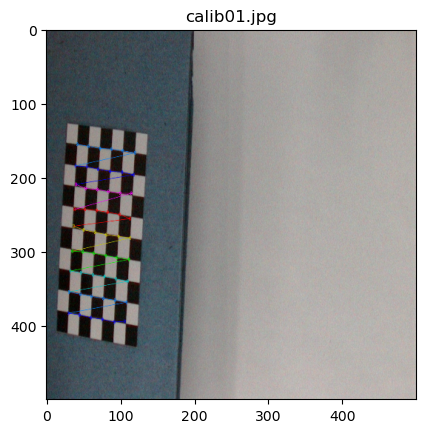

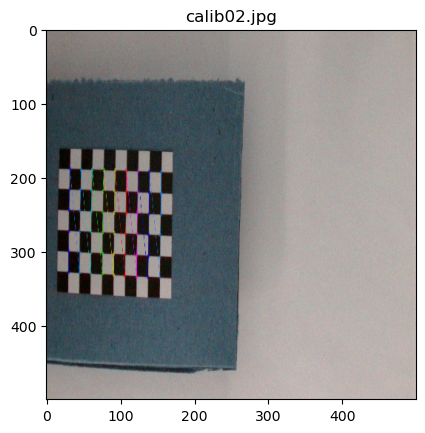

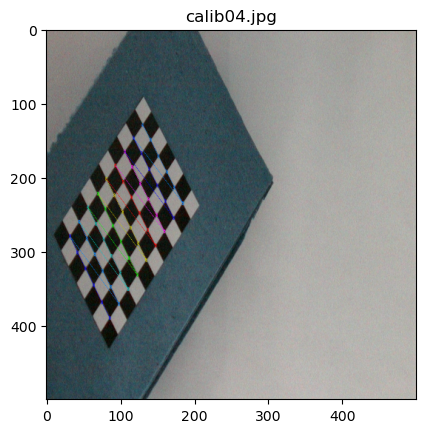

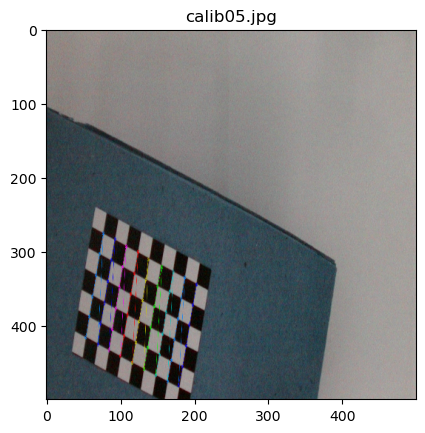

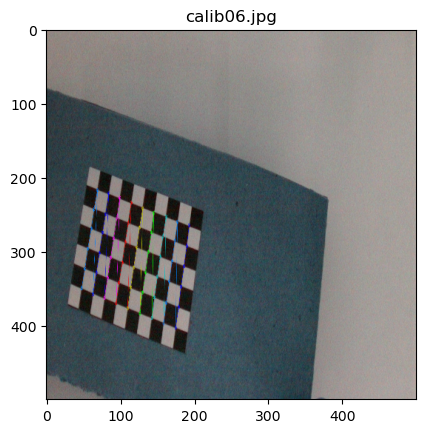

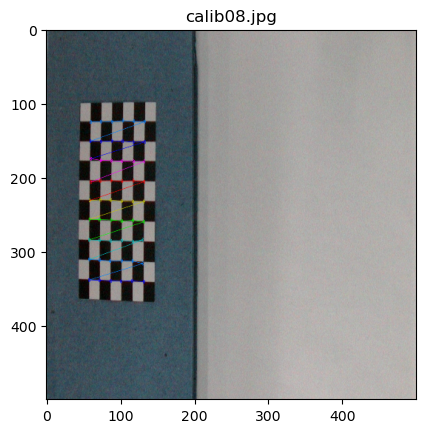

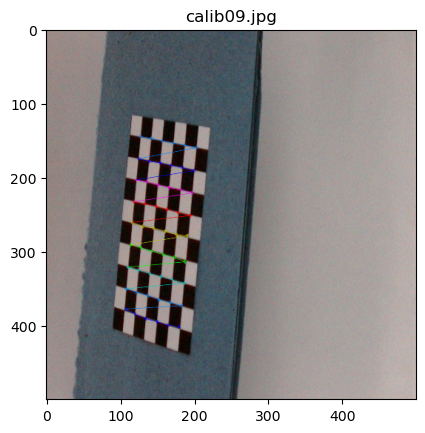

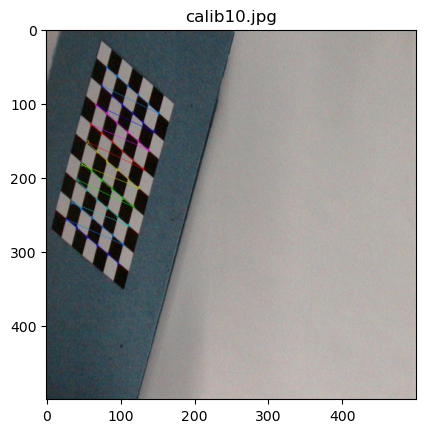

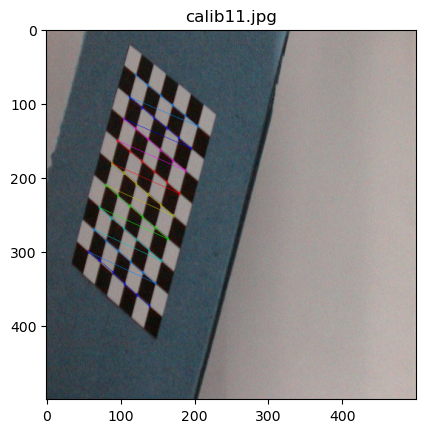

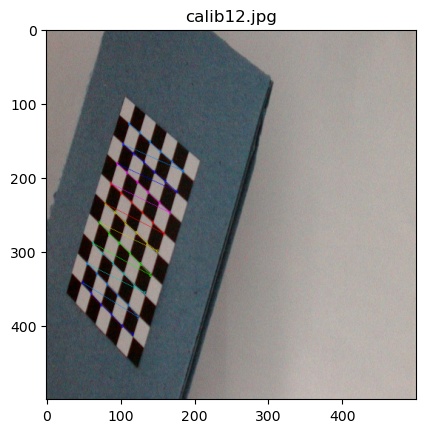

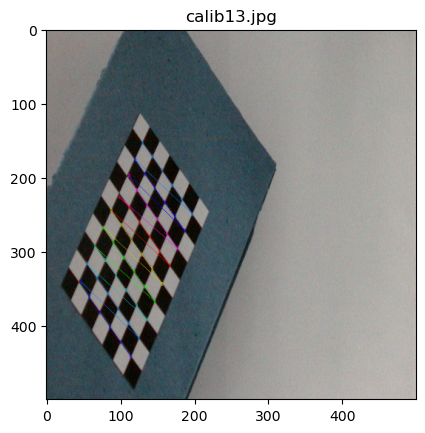

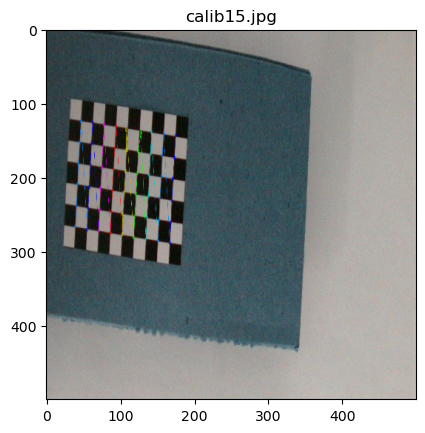

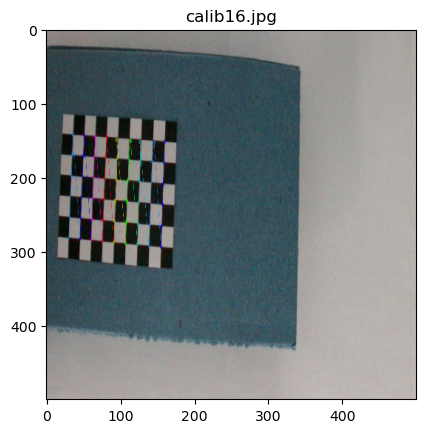

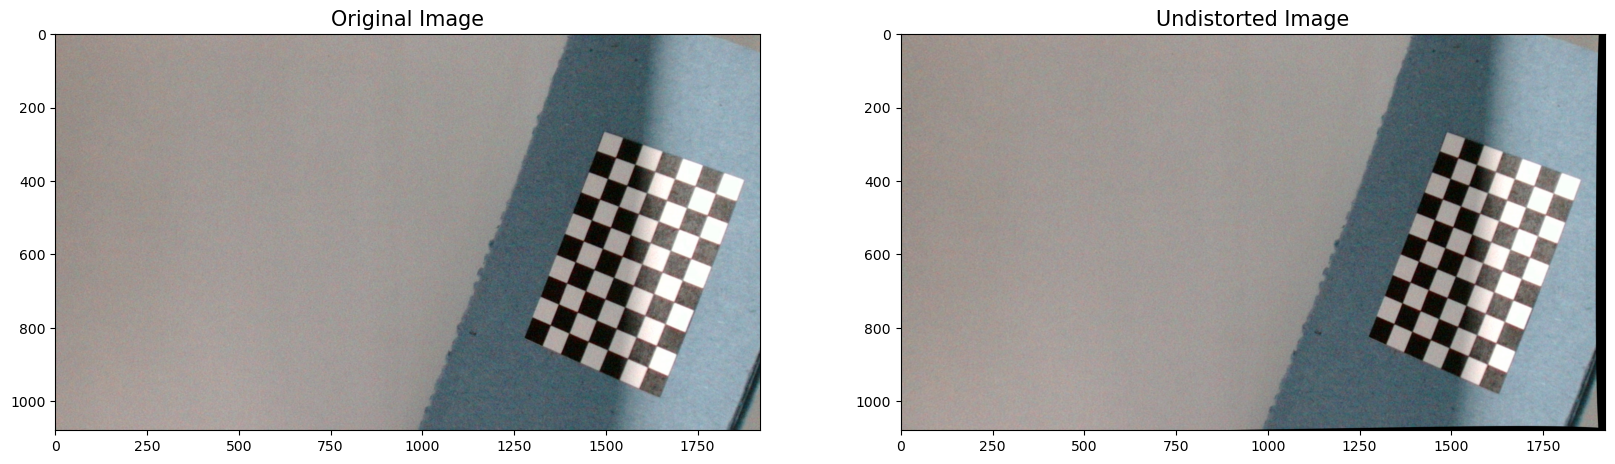

In [4]:
# Save camera intrinsic matrix, K
ret, mtx, dist, rvecs, tvecs = Calibrate()
# Code used to store varaibles, Inntrinsic params as mtx, and distortion coeficient as dist. Uncomment the below lines to store them again.
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
# pickle.dump(dist_pickle, open(impath+"camera_intrinsics.pkl", "wb"))